 <H1> COVID-19 Analysis </H1>

<h2><i>Project by:</i></h2>
<p><b>PRASFUR TIWARI</b></p>
<p><b>DIVYANSH TIWARI</b></p>
<p><b>SONAM KUMAR</b></p>

<h2>Data Analysis</h2>

<h3>Importing needed modules</h3>

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime 
import folium
#from pylab import rcParams

<h3>Importing Necessary CSVs and Converting them to pandas dataframe</h3>

In [363]:
df_population=pd.read_csv('https://raw.githubusercontent.com/DivyT-03/Project/master/population_india_census2011.csv')
df_population.head()

,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


In [404]:
df_main=pd.read_csv('https://raw.githubusercontent.com/DivyT-03/Project/master/covid_19_india.csv')
df_main.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [460]:
states=df_main.groupby('State/UnionTerritory').sum()
states.reset_index(inplace=True)
states.reset_index(inplace=True)
states.sort_values(["State/UnionTerritory"],axis=0,ascending=True,inplace=True)
states.rename(columns={"index":"State_ID"},inplace=True)
states["State_ID"]=states["State_ID"]+2
states_names=states["State/UnionTerritory"]

In [75]:
df_main.dtypes

Sno                          int64
Date                        object
Time                        object
State/UnionTerritory        object
ConfirmedIndianNational     object
ConfirmedForeignNational    object
Cured                        int64
Deaths                       int64
Confirmed                    int64
dtype: object

<h2>Removing Unnecessary Columns</h2>

In [76]:
df=df_main[["Date","State/UnionTerritory","Cured","Deaths","Confirmed"]]
df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,30/01/20,Kerala,0,0,1
1,31/01/20,Kerala,0,0,1
2,01/02/20,Kerala,0,0,2
3,02/02/20,Kerala,0,0,3
4,03/02/20,Kerala,0,0,3


<h3>Creating List of States, Dates and Columns to make the final dataframe</h3>

In [77]:
state=df_population['State / Union Territory'].tolist()
state.sort()
print("Total states + union territories:",len(state))

Total states + union territories: 36


In [222]:
dates=list(df.Date.unique())
print("Total days:",len(dates))

Total days: 90


<h3>Creating Various Lists of Values to be inserted in Dataframe columns</h3>

In [79]:
col=["Day","State_ID","Cured","Deaths","Confirmed"]
Date_ID=[]
State_ID=[]
Cured=[]
Deaths=[]
Confirmed=[]
    
for d_id,d in enumerate(dates,1):

    for s_id,s in enumerate(state,1):
        
        df_val=df[df["Date"]==d]
        df_val=df_val[df_val["State/UnionTerritory"]==s]
        
        Date_ID.append(d_id)
        State_ID.append(s_id)
        
        try:
            Cu=df_val.Cured.to_list()[0]
            De=df_val.Deaths.to_list()[0]
            Co=df_val.Confirmed.to_list()[0]
        except:
            Cu=0
            De=0
            Co=0

        Cured.append(Cu)
        Deaths.append(De)
        Confirmed.append(Co)
    

<h2>Making the final dataframe</h2>

In [80]:
list_of_tuples = list(zip(Date_ID,State_ID,Cured,Deaths,Confirmed))  
df_cv = pd.DataFrame(list_of_tuples, columns = col)
df_cv.head()

,Day,State_ID,Cured,Deaths,Confirmed
0,1,1,0,0,0
1,1,2,0,0,0
2,1,3,0,0,0
3,1,4,0,0,0
4,1,5,0,0,0


In [81]:
print("Our dataset has {} rows and {} columns".format(df_cv.shape[0],df_cv.shape[1]))

Our dataset has 3240 rows and 5 columns


<h2>Data Cleaning</h2>

In [82]:
df_cv.isnull()

,Day,State_ID,Cured,Deaths,Confirmed
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3235,False,False,False,False,False
3236,False,False,False,False,False
3237,False,False,False,False,False
3238,False,False,False,False,False


In [83]:
df_cv.isnull().sum()

Day          0
State_ID     0
Cured        0
Deaths       0
Confirmed    0
dtype: int64

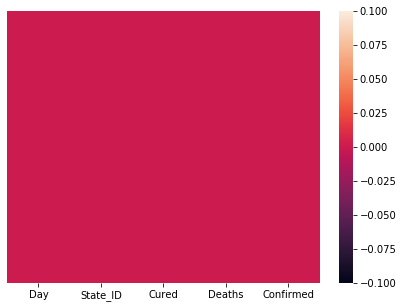

In [84]:
import seaborn as sns
plt.rcParams['figure.figsize'] = 7, 5
sns.heatmap(df_cv.isnull(),yticklabels=False)
plt.show()

<p><b>As there are no null values in our dataframe, we do not need to perform any clean-up.</b></p>

<h2>Descriptive Statistics</h2>

In [85]:
df_cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Day        3240 non-null   int64
 1   State_ID   3240 non-null   int64
 2   Cured      3240 non-null   int64
 3   Deaths     3240 non-null   int64
 4   Confirmed  3240 non-null   int64
dtypes: int64(5)
memory usage: 126.7 KB


In [86]:
df_cv.describe()

,Day,State_ID,Cured,Deaths,Confirmed
count,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000
mean,45.500000,18.500000,18.543519,3.514198,113.262963
std,25.983168,10.389898,86.521402,20.324592,485.455153
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,23.000000,9.750000,0.000000,0.000000,0.000000
50%,45.500000,18.500000,0.000000,0.000000,0.000000
75%,68.000000,27.250000,1.000000,0.000000,14.000000
max,90.000000,36.000000,1282.000000,369.000000,8590.000000


In [87]:
df_cv.dtypes

Day          int64
State_ID     int64
Cured        int64
Deaths       int64
Confirmed    int64
dtype: object

<h2>Correlation</h2>

In [88]:
df_cv.corr()

,Day,State_ID,Cured,Deaths,Confirmed
Day,1.000000,0.000000,0.314138,0.240134,0.320251
State_ID,0.000000,1.000000,0.046567,0.017863,0.043311
Cured,0.314138,0.046567,1.000000,0.702193,0.852398
Deaths,0.240134,0.017863,0.702193,1.000000,0.928176
Confirmed,0.320251,0.043311,0.852398,0.928176,1.000000


In [89]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df_cv['Day'], df_cv['Confirmed'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.32025062894757106  with a P-value of P = 3.5935834038176137e-78


<h4>Observation:</h4>
Since the p-value is < 0.001, the correlation between Day and Confirmed Cases is statistically significant, and the <b>linear relationship isn't quite strong</b> (~0.320).

In [90]:
pearson_coef, p_value = stats.pearsonr(df_cv['Day'], df_cv['Cured'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.31413750074578894  with a P-value of P = 3.9418327596882333e-75


<h4>Observation:</h4>
Since the p-value is < 0.001, the correlation between Day and Cured Patients is statistically significant, and the <b>linear relationship isn't quite strong</b> (~0.314).

In [91]:
pearson_coef, p_value = stats.pearsonr(df_cv['Day'], df_cv['Deaths'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.2401340504161507  with a P-value of P = 1.0070310998720153e-43


<h4>Observation</h4>
Since the p-value is < 0.001, the correlation between Day and Deaths is statistically significant, and the <b>linear relationship isn't quite strong</b> (~0.240).

In [92]:
df_cv.head()

,Day,State_ID,Cured,Deaths,Confirmed
0,1,1,0,0,0
1,1,2,0,0,0
2,1,3,0,0,0
3,1,4,0,0,0
4,1,5,0,0,0


<h2>Data Visualization</h2>

<p>We take the data of only 56 days from the beginning, i.e. data till first lockdown, and keep the rest of the data for prediction.</p>

In [407]:
df_cv1=df_cv[df_cv['Day']<57]

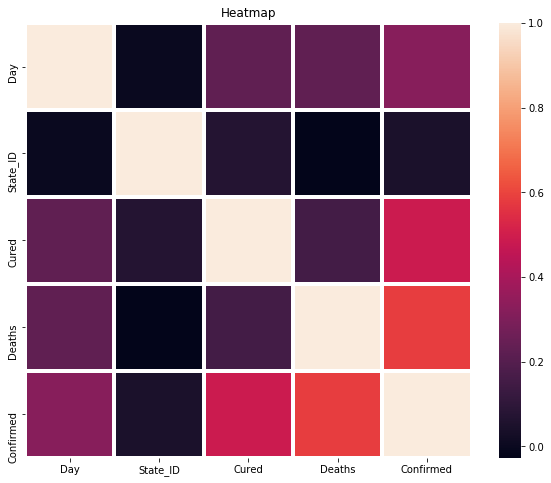

In [408]:
# Plotting the heatmap of the data set
plt.figure(figsize=(10,8))
sns.heatmap(df_cv1.corr(),linewidths=3)
plt.title('Heatmap')
plt.show()

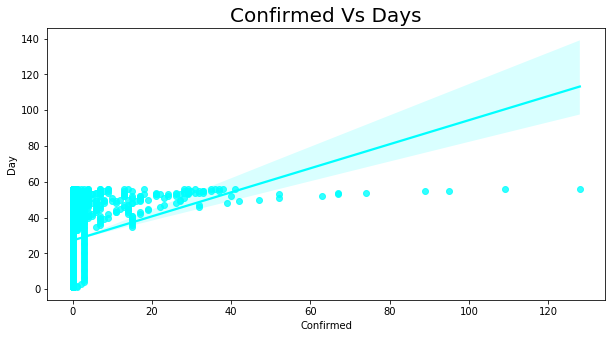

In [409]:
# Relation between Confirmed Cases and Days
plt.figure(1,figsize=(10,5))
sns.regplot(df_cv1['Confirmed'],df_cv1['Day'],color='aqua')
plt.title('Confirmed Vs Days',size=20)
plt.show()

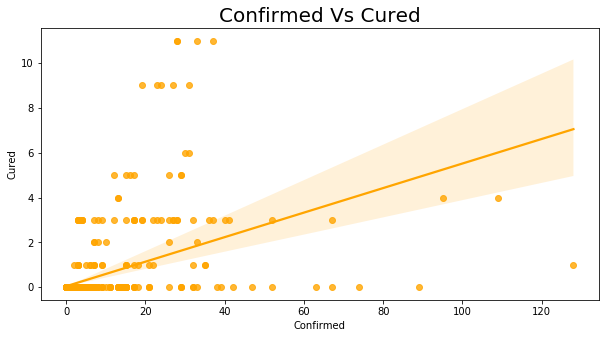

In [410]:
# Relation between Confirmed Cases and Cured Cases
plt.figure(1,figsize=(10,5))
sns.regplot(df_cv1['Confirmed'],df_cv1['Cured'],color='orange')
plt.title('Confirmed Vs Cured',size=20)
plt.show()

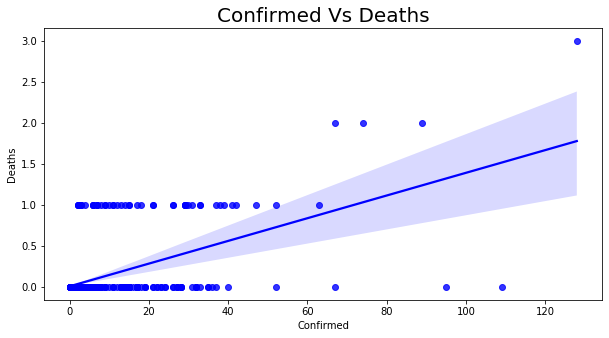

In [411]:
# Relation between Confirmed Cases and Deaths
plt.figure(1,figsize=(10,5))
sns.regplot(df_cv1['Confirmed'],df_cv1['Deaths'],color='Blue')
plt.title('Confirmed Vs Deaths',size=20)
plt.show()

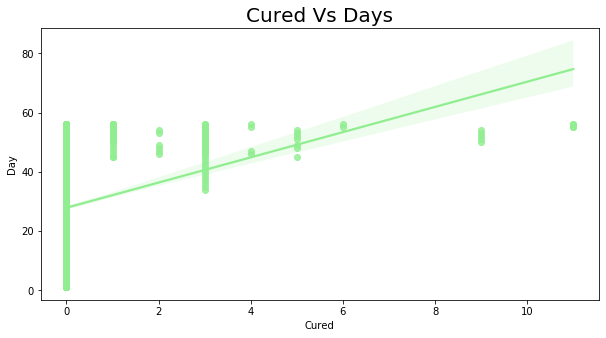

In [415]:
# Relation between Cured Cases and Days
plt.figure(1,figsize=(10,5))
sns.regplot(df_cv1['Cured'],df_cv1['Day'],color='LightGreen')
plt.title('Cured Vs Days',size=20)
plt.show()

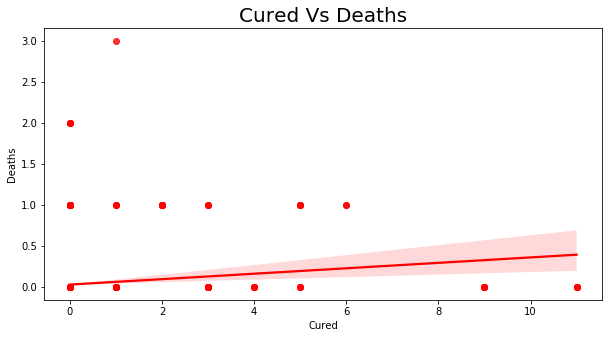

In [413]:
# Relation between Cured Cases and Deaths
plt.figure(1,figsize=(10,5))
sns.regplot(df_cv1['Cured'],df_cv1['Deaths'],color='Red')
plt.title('Cured Vs Deaths',size=20)
plt.show()

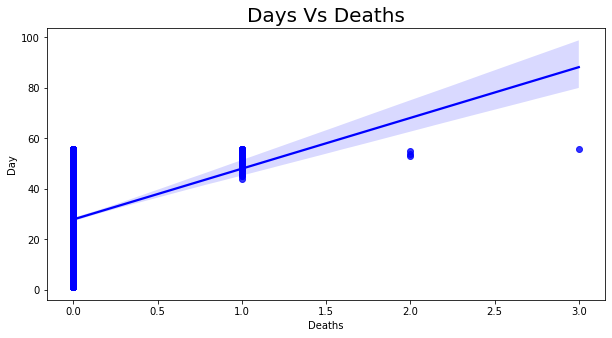

In [416]:
# Relation between Deaths and Days
plt.figure(1,figsize=(10,5))
sns.regplot(df_cv1['Deaths'],df_cv1['Day'],color='Blue')
plt.title('Days Vs Deaths',size=20)
plt.show()

<h1>Day-wise analysis</h1>

In [424]:
df2=df_cv1
df2.drop(columns=["State_ID"],axis=1,inplace=True)
df2=df2.groupby(['Day']).sum()
df2.reset_index(inplace=True)
df2.head()

C:\Users\smile\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Day,Cured,Deaths,Confirmed
0,1,0,0,1
1,2,0,0,1
2,3,0,0,2
3,4,0,0,3
4,5,0,0,3


<h2>1. Confirmed Cases' Plots</h2>

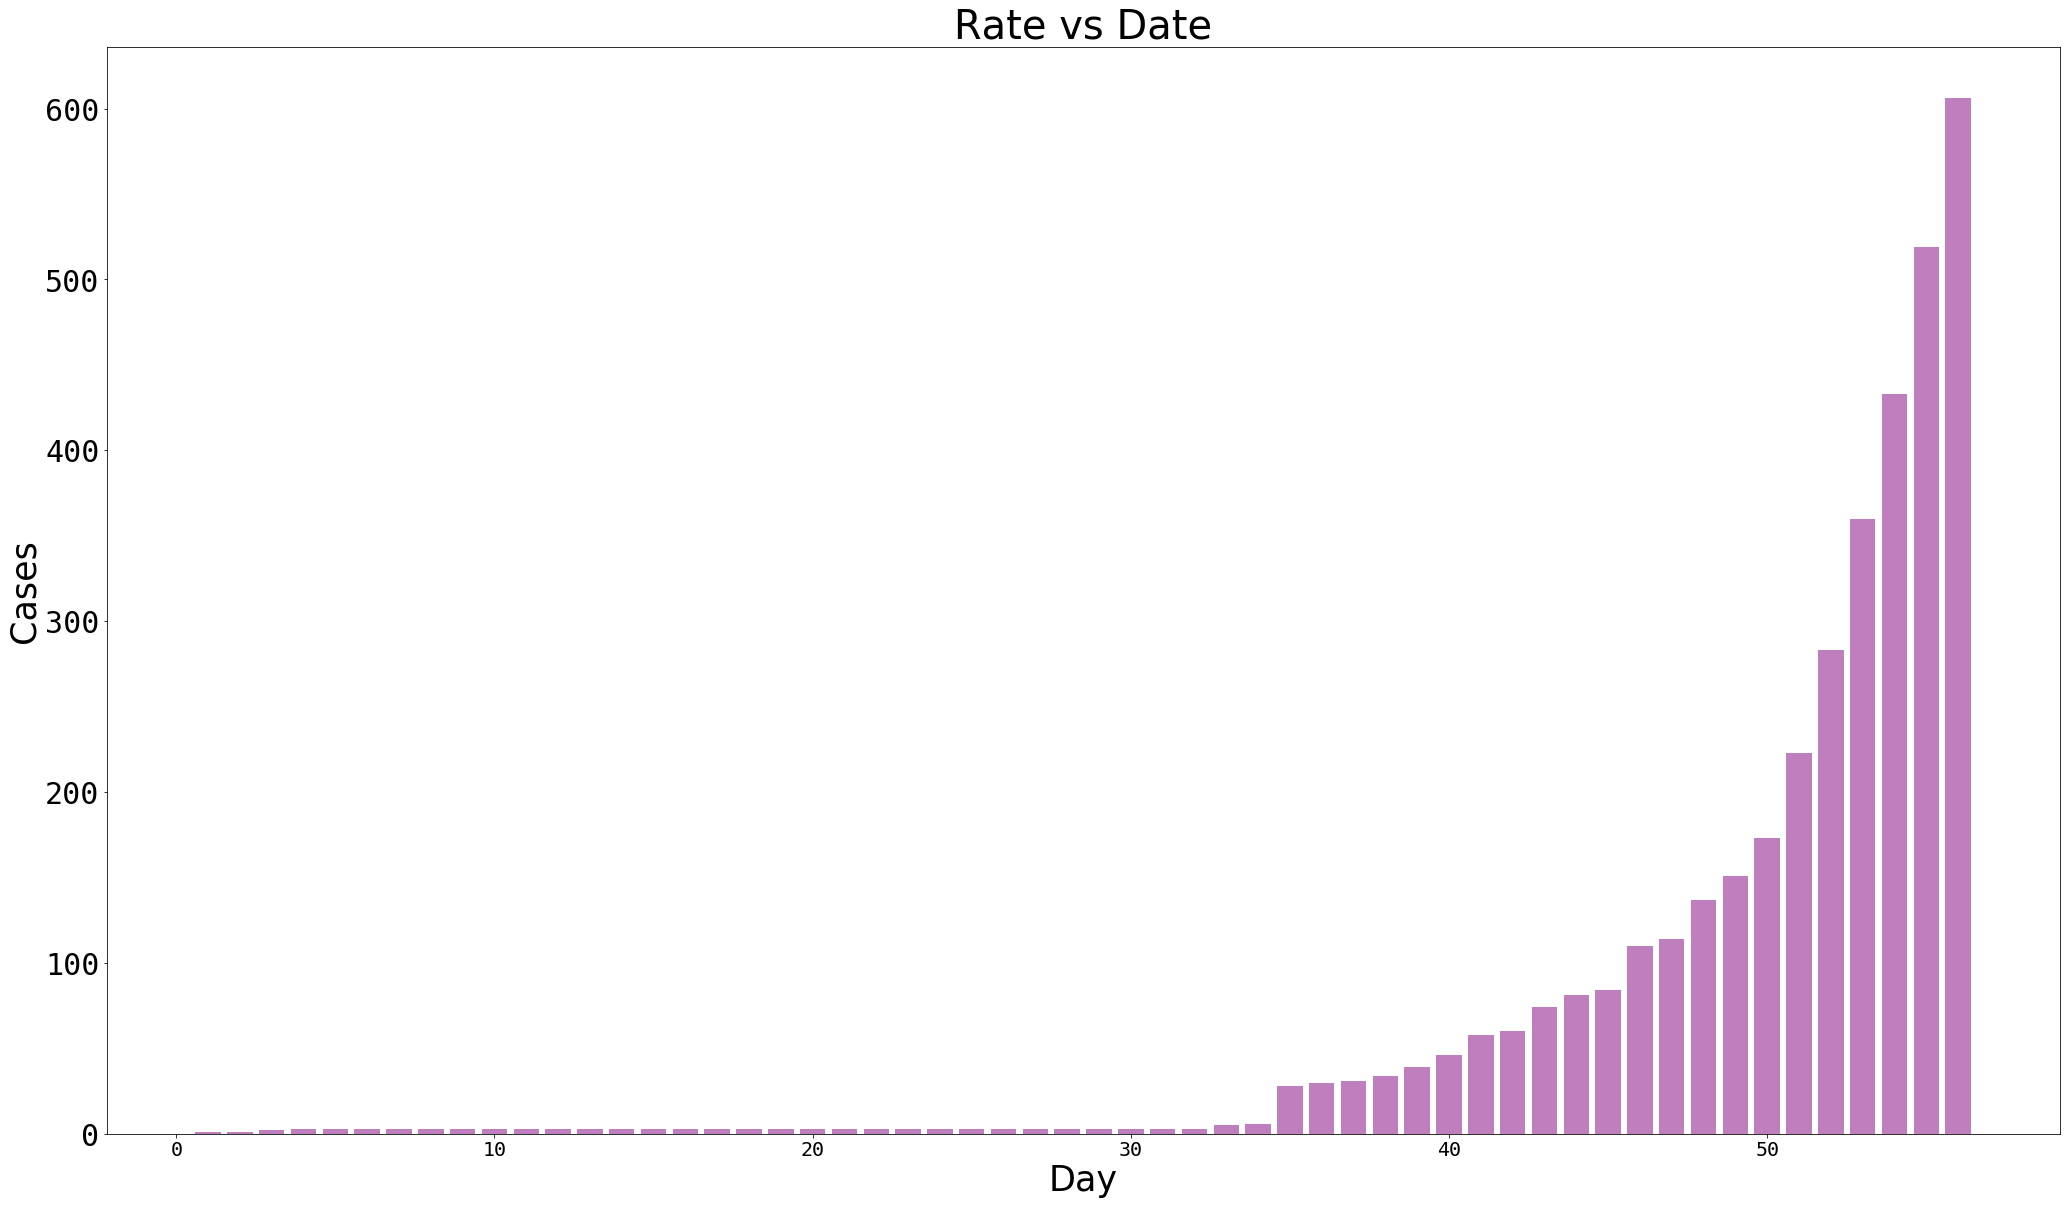

In [425]:
plt.figure(figsize=(35,20))
plt.bar(df2['Day'],df2['Confirmed'],align='center',alpha=0.5,color='purple')
plt.title("Rate vs Date",size=40)
plt.xlabel("Day",size=35)
plt.xticks(fontsize=20,fontname='monospace')
plt.ylabel("Cases",size=35)
plt.yticks(fontsize=30,fontname='monospace')
plt.show()

In [426]:
print("Confirmed cases:",df2['Confirmed'].max())

Confirmed cases: 606


<h4>The curve depicts the exponential increase in the infected rates.</h4>

<h2>2. Cured Rate's Plot</h2>

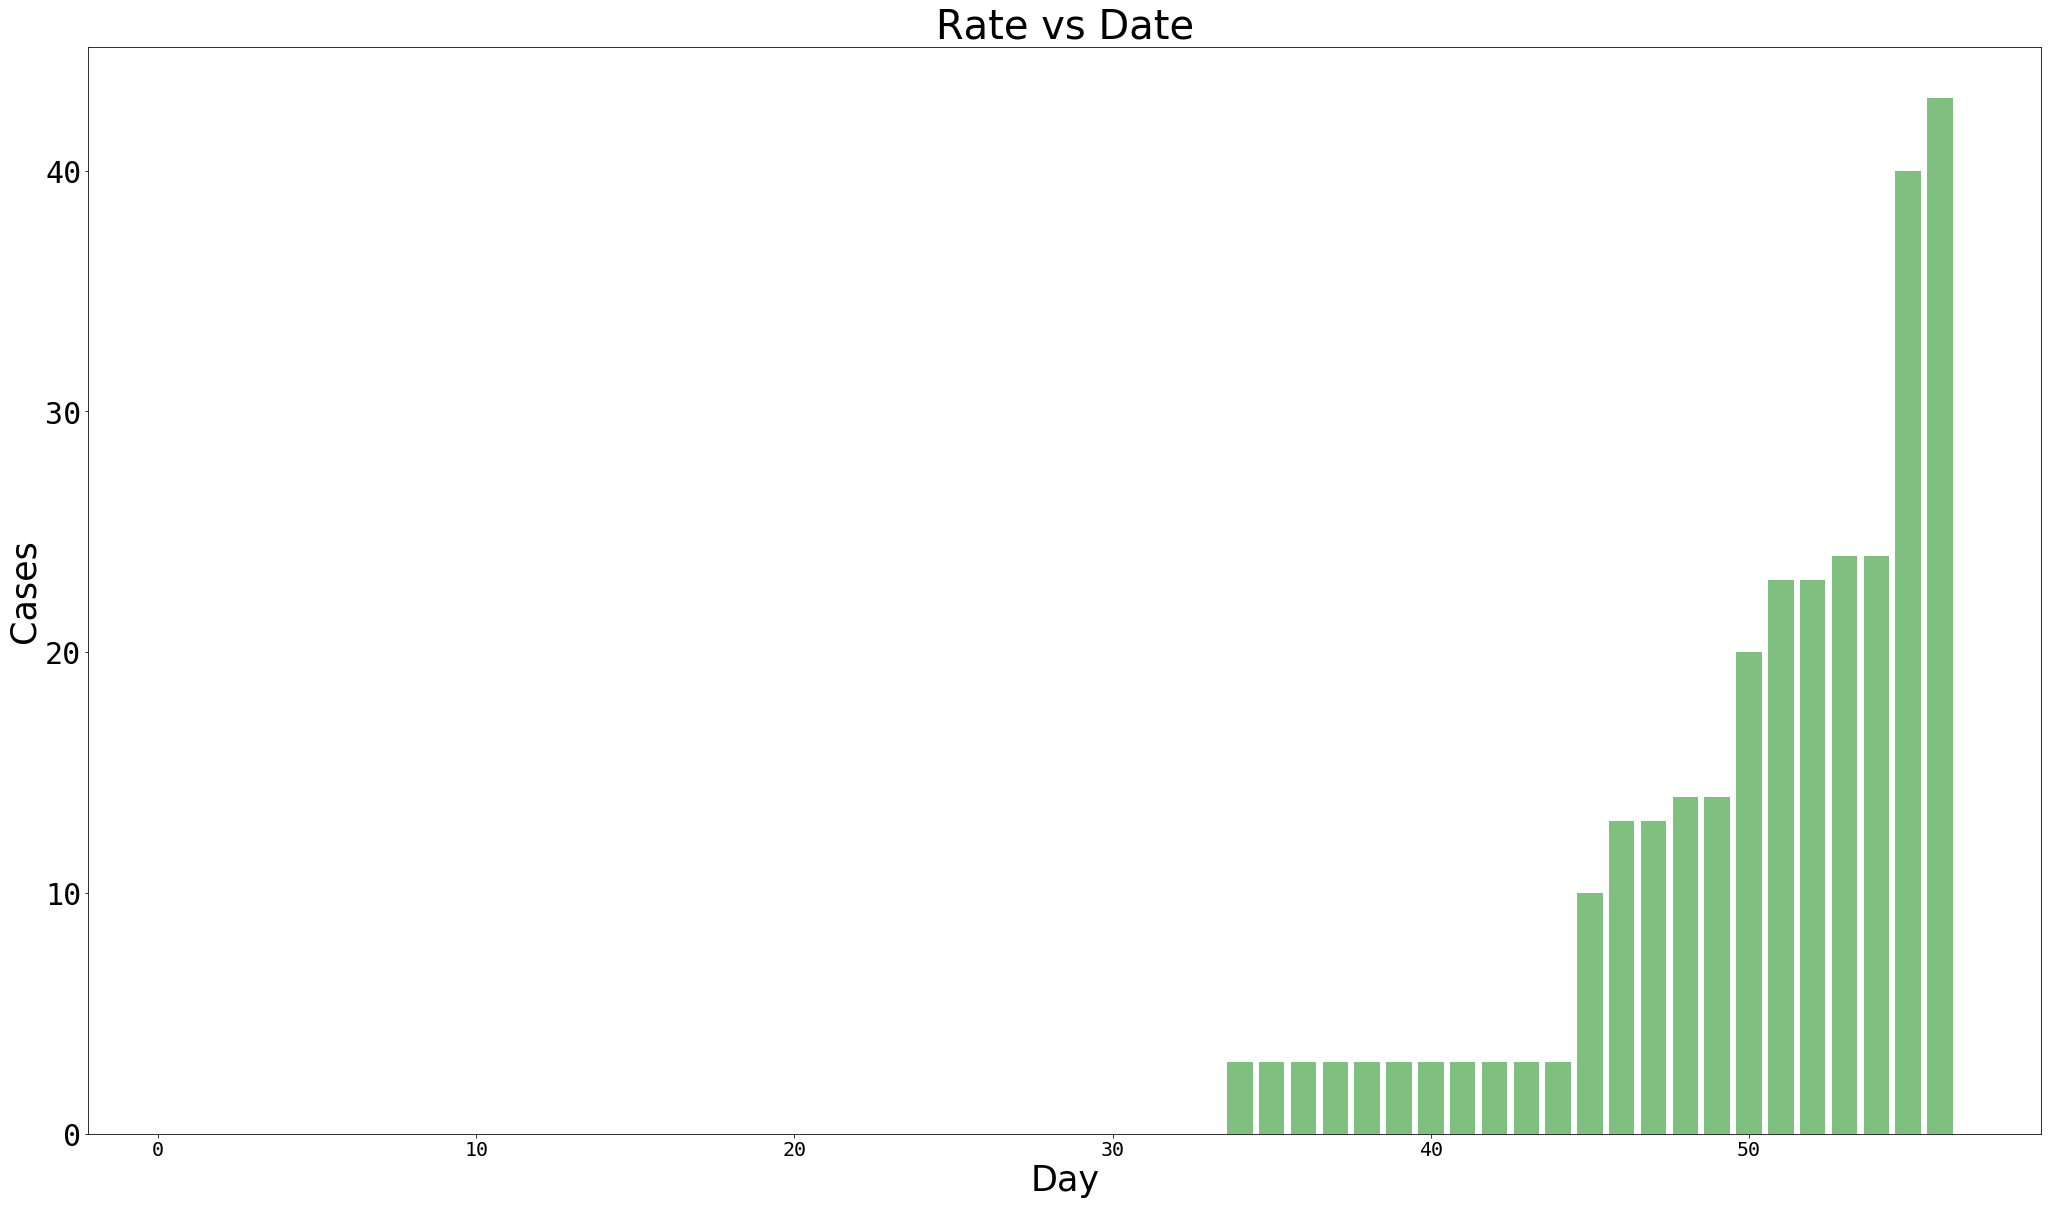

In [427]:
d3=df2
plt.figure(figsize=(35,20))
plt.bar(d3['Day'],d3['Cured'],align='center',alpha=0.5,color="Green")
plt.title("Rate vs Date",size=40)
plt.xlabel("Day",size=35)
plt.xticks(fontsize=20,fontname='monospace')
plt.ylabel("Cases",size=35)
plt.yticks(fontsize=30,fontname='monospace')
plt.show()

<h2>3. Death Rate's Plots</h2>

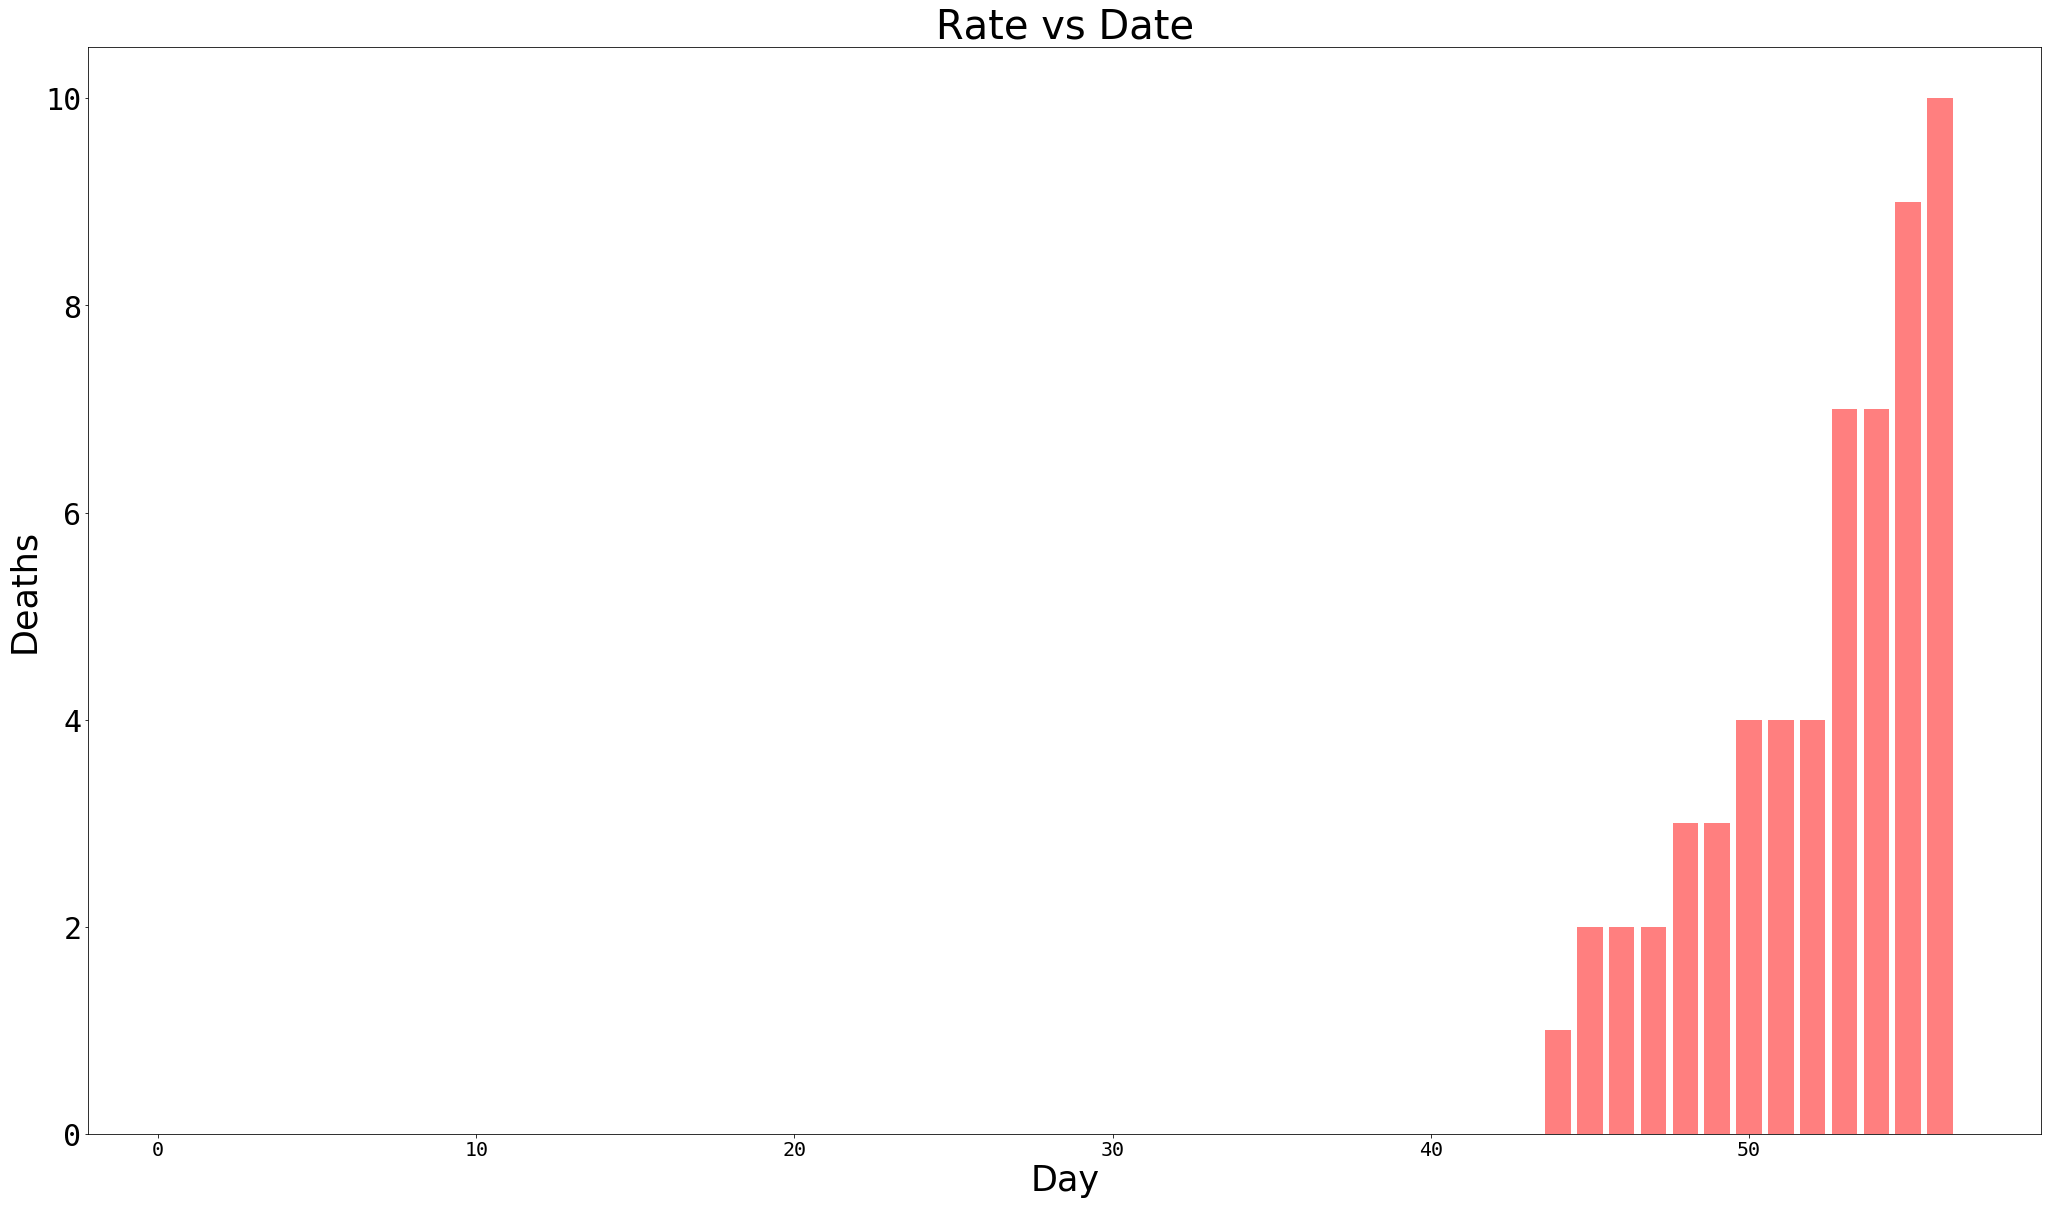

In [428]:
d4=df2
plt.figure(figsize=(35,20))
plt.bar(d4['Day'],d4['Deaths'],align='center',alpha=0.5,color="Red")
plt.title("Rate vs Date",size=40)
plt.xlabel("Day",size=35)
plt.xticks(fontsize=20,fontname='monospace')
plt.ylabel("Deaths",size=35)
plt.yticks(fontsize=30,fontname='monospace')
plt.show()

<h4>From the plots, it's utterly significant that the confirmed, cured and the death rates rose exponentially.</h4>

In [436]:
a=df2['Confirmed'].max()
b=df2['Cured'].max()
c=df2['Deaths'].max()
d=df2['Cured'].max()/df2['Confirmed'].max()*100
e=df2['Deaths'].max()/df2['Confirmed'].max()*100
A={"Feature":["Total Infected","Total Cured","Total Deaths","Cured %","Death %"],"Analysis":[a,b,c,d,e]}
Analysis=pd.DataFrame(A)
Analysis.Analysis=Analysis.Analysis.astype('int64')
Analysis.set_index(['Feature','Analysis'],inplace=True)
Analysis

,
Feature,Analysis
Total Infected,606
Total Cured,43
Total Deaths,10
Cured %,7
Death %,1


<H1>State-wise analysis</H1>

In [438]:
df3=df_cv[df_cv['Day']<57]
df3.drop(columns=['Day'],axis=1,inplace=True)
df3=df3.groupby(['State_ID']).sum()
df3.reset_index(inplace=True)
#df3['State_Name']=states_names
df3.head()

,State_ID,Cured,Deaths,Confirmed
0,1,0,0,0
1,2,1,0,44
2,3,0,0,0
3,4,0,0,0
4,5,0,4,11


<h2>1. Confirmed Cases' Plots</h2>

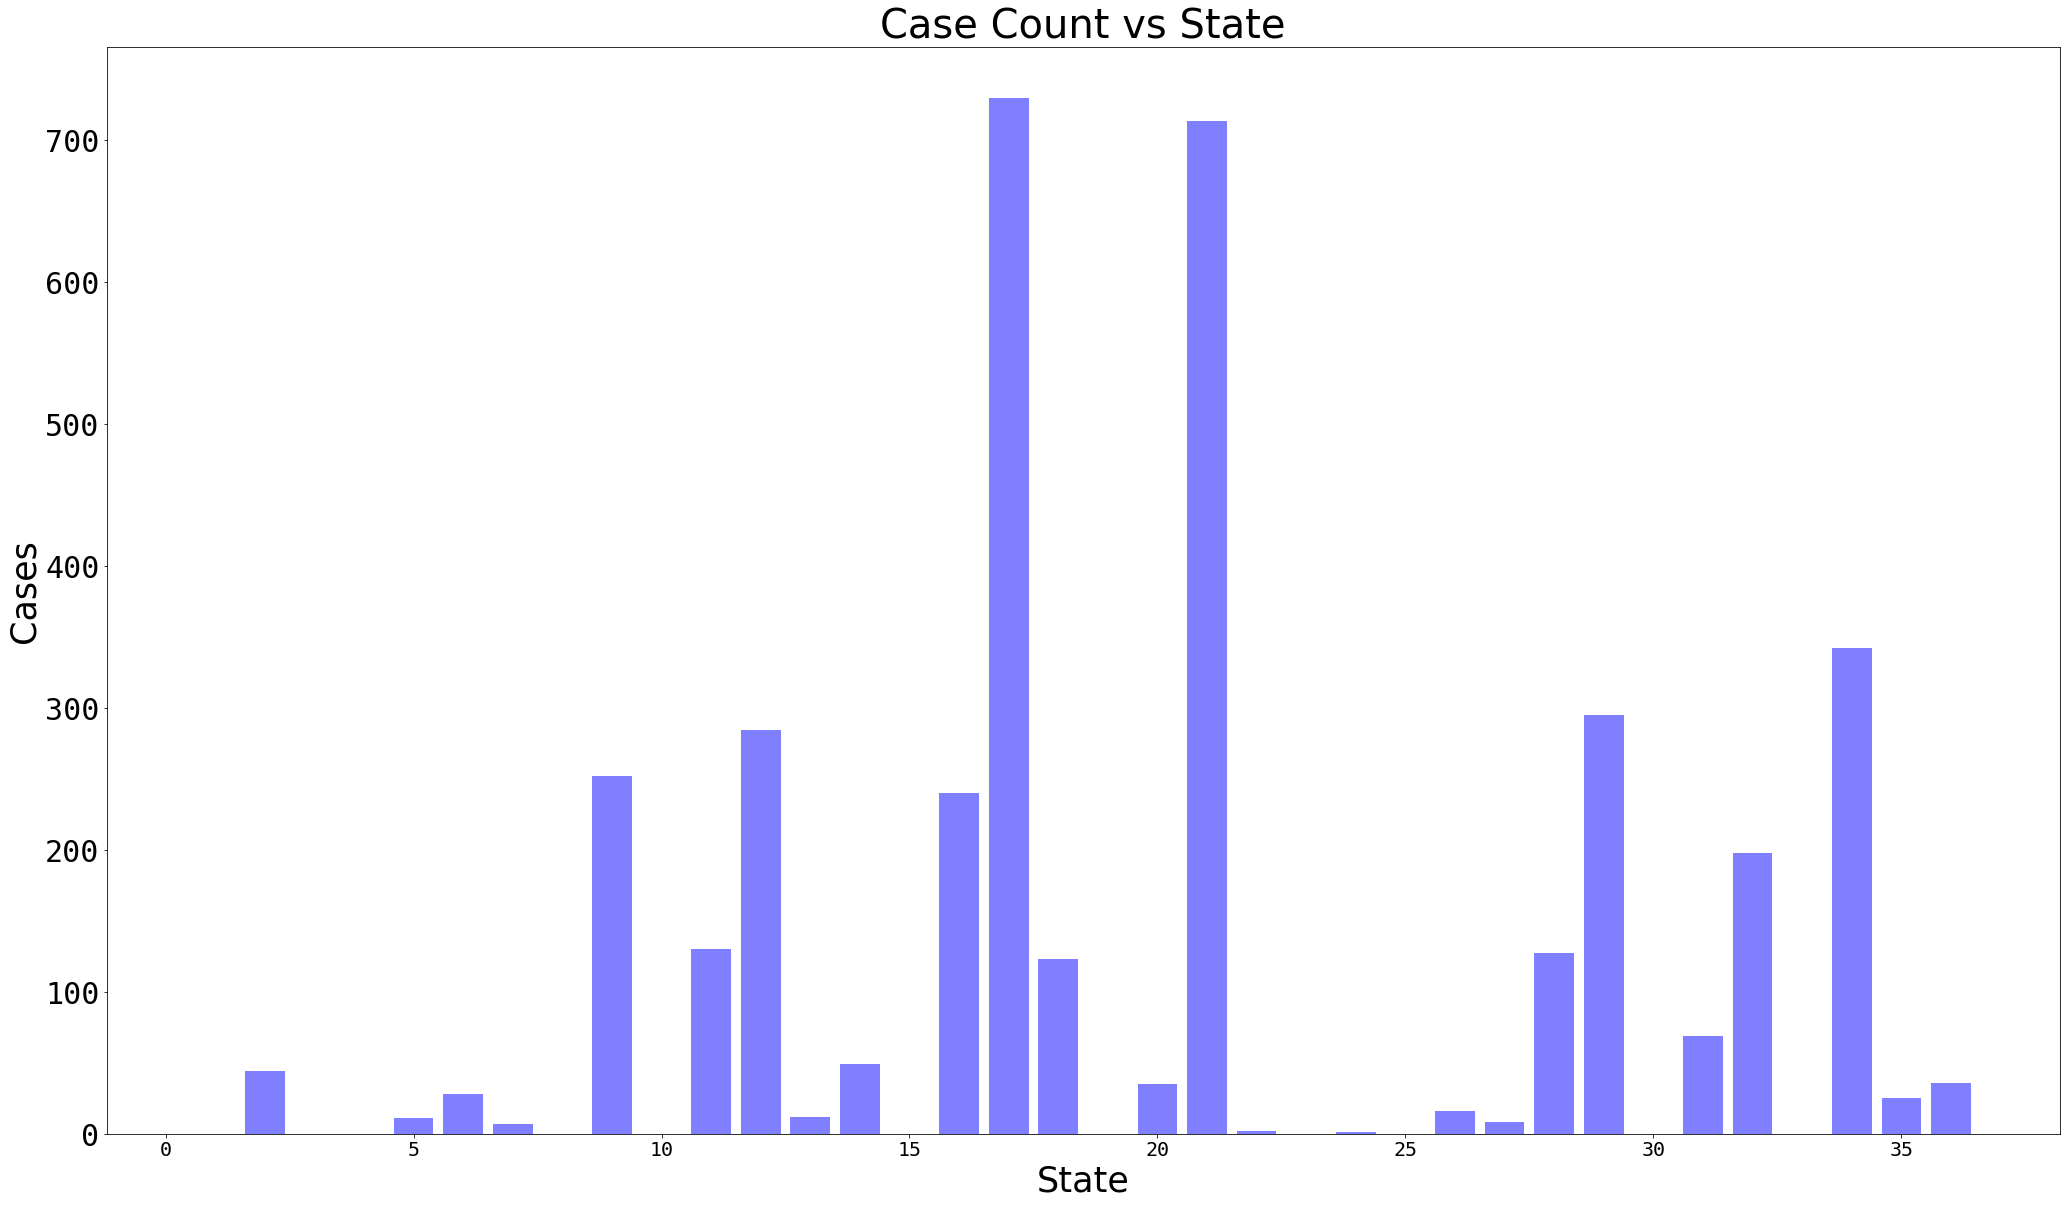

Top 5 most infected states:



,State_ID,Confirmed
16,17,729
20,21,713
33,34,342
28,29,295
11,12,284


In [439]:
d5=df3
plt.figure(figsize=(35,20))
plt.bar(df3['State_ID'],df3['Confirmed'],align='center',alpha=0.5,color="Blue")
plt.title("Case Count vs State",size=40)
plt.xlabel("State",size=35)
plt.xticks(fontsize=20,fontname='monospace')
plt.ylabel("Cases",size=35)
plt.yticks(fontsize=30,fontname='monospace')
plt.show()
d5.sort_values(["Confirmed"],axis=0,ascending=False,inplace=True)
print("Top 5 most infected states:\n")
d5[['State_ID','Confirmed']].head()

<h2>2. Cured Rate's Plot</h2>

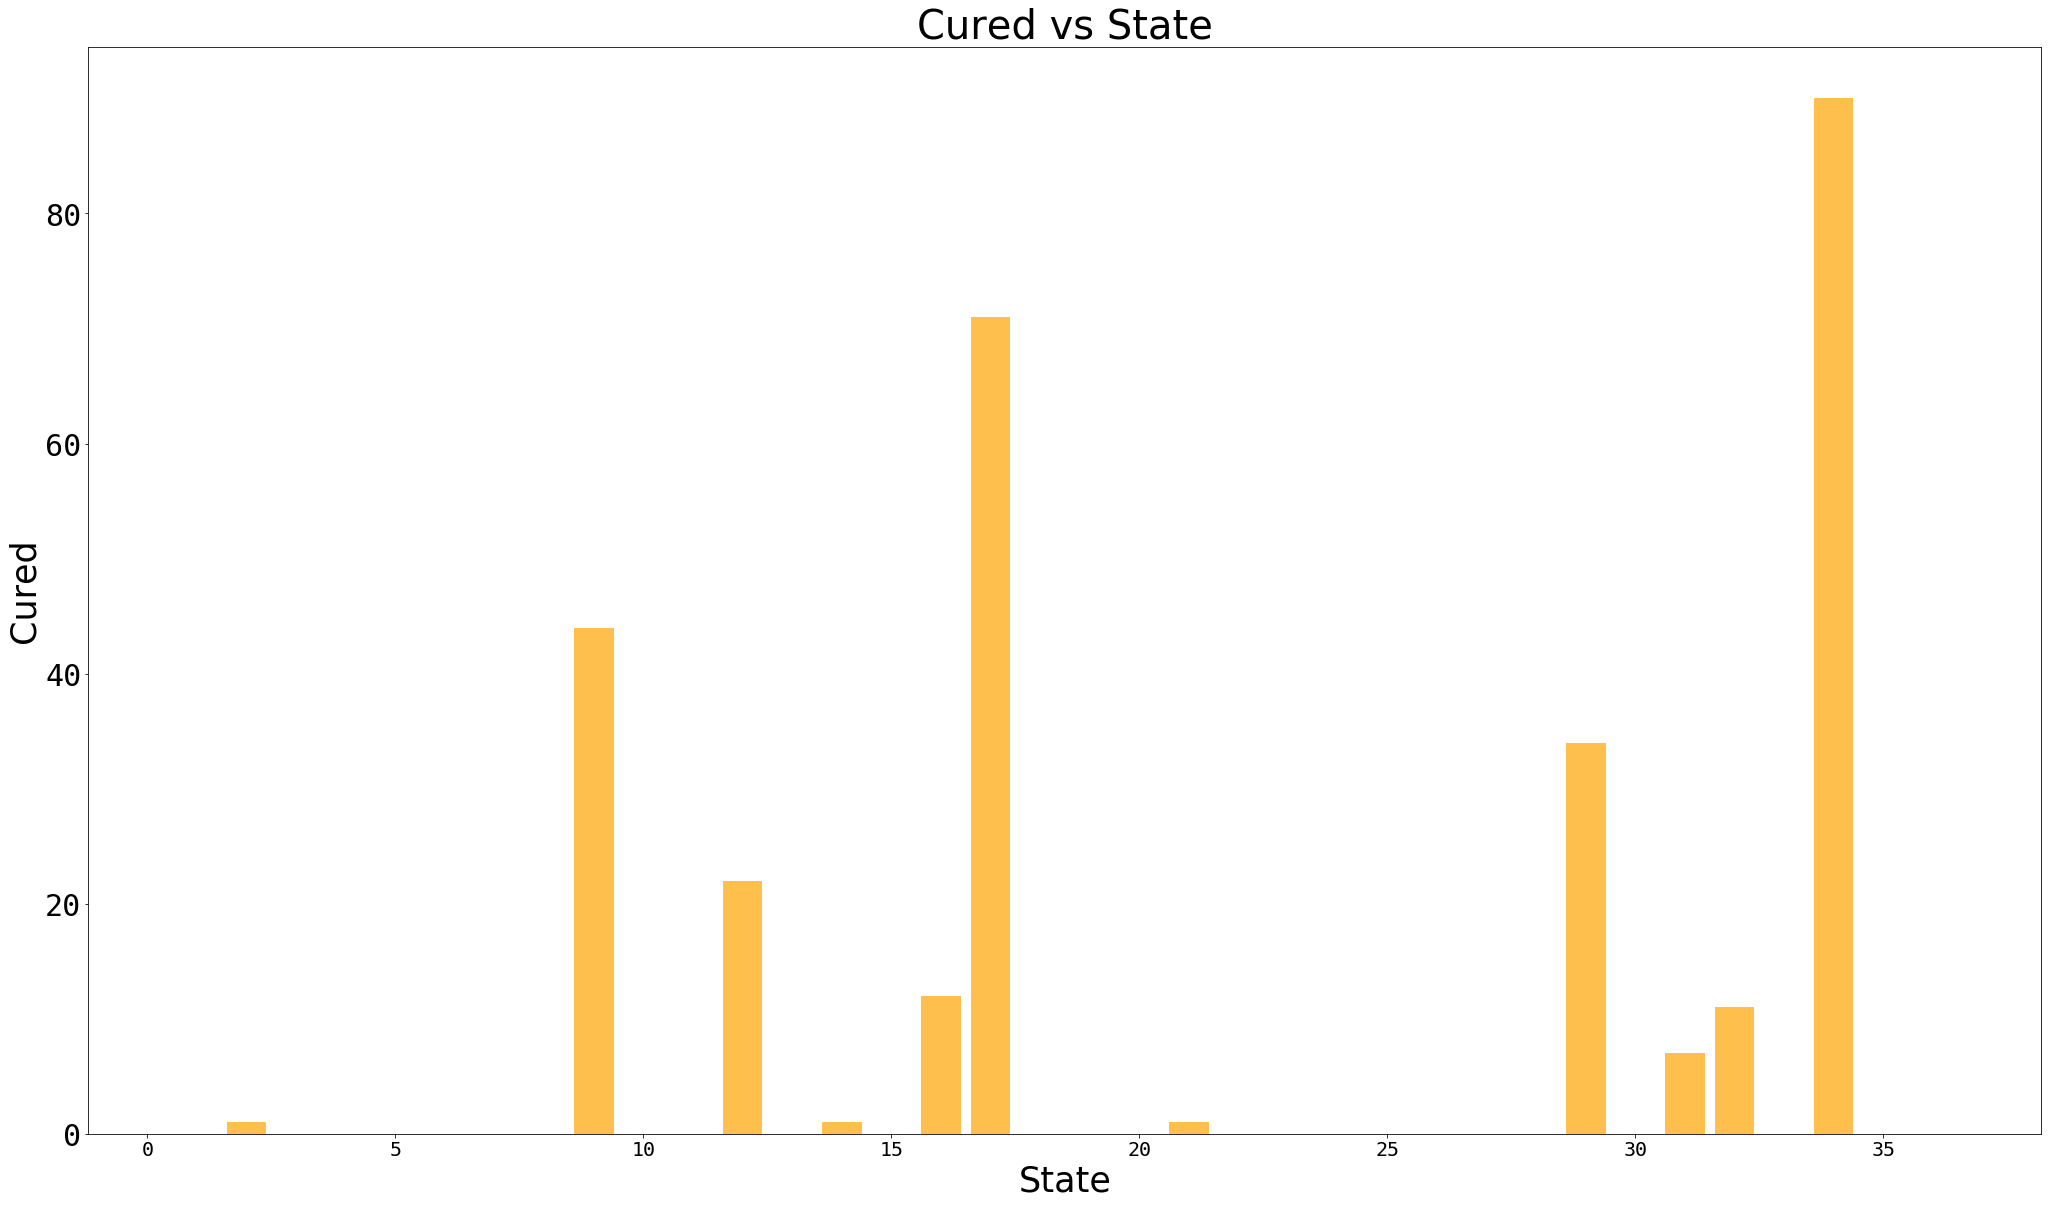

Top 5 states with most cured cases:



,State_ID,Cured
33,34,90
16,17,71
8,9,44
28,29,34
11,12,22


In [440]:
d6=df3
plt.figure(figsize=(35,20))
plt.bar(df3['State_ID'],df3['Cured'],align='center',alpha=0.7,color="Orange")
plt.title("Cured vs State",size=40)
plt.xlabel("State",size=35)
plt.xticks(fontsize=20,fontname='monospace')
plt.ylabel("Cured",size=35)
plt.yticks(fontsize=30,fontname='monospace')
plt.show()
d6.sort_values(["Cured"],axis=0,ascending=False,inplace=True)
print("Top 5 states with most cured cases:\n")
d6[['State_ID','Cured']].head()

<h2>3. Death Rate's Plot</h2>

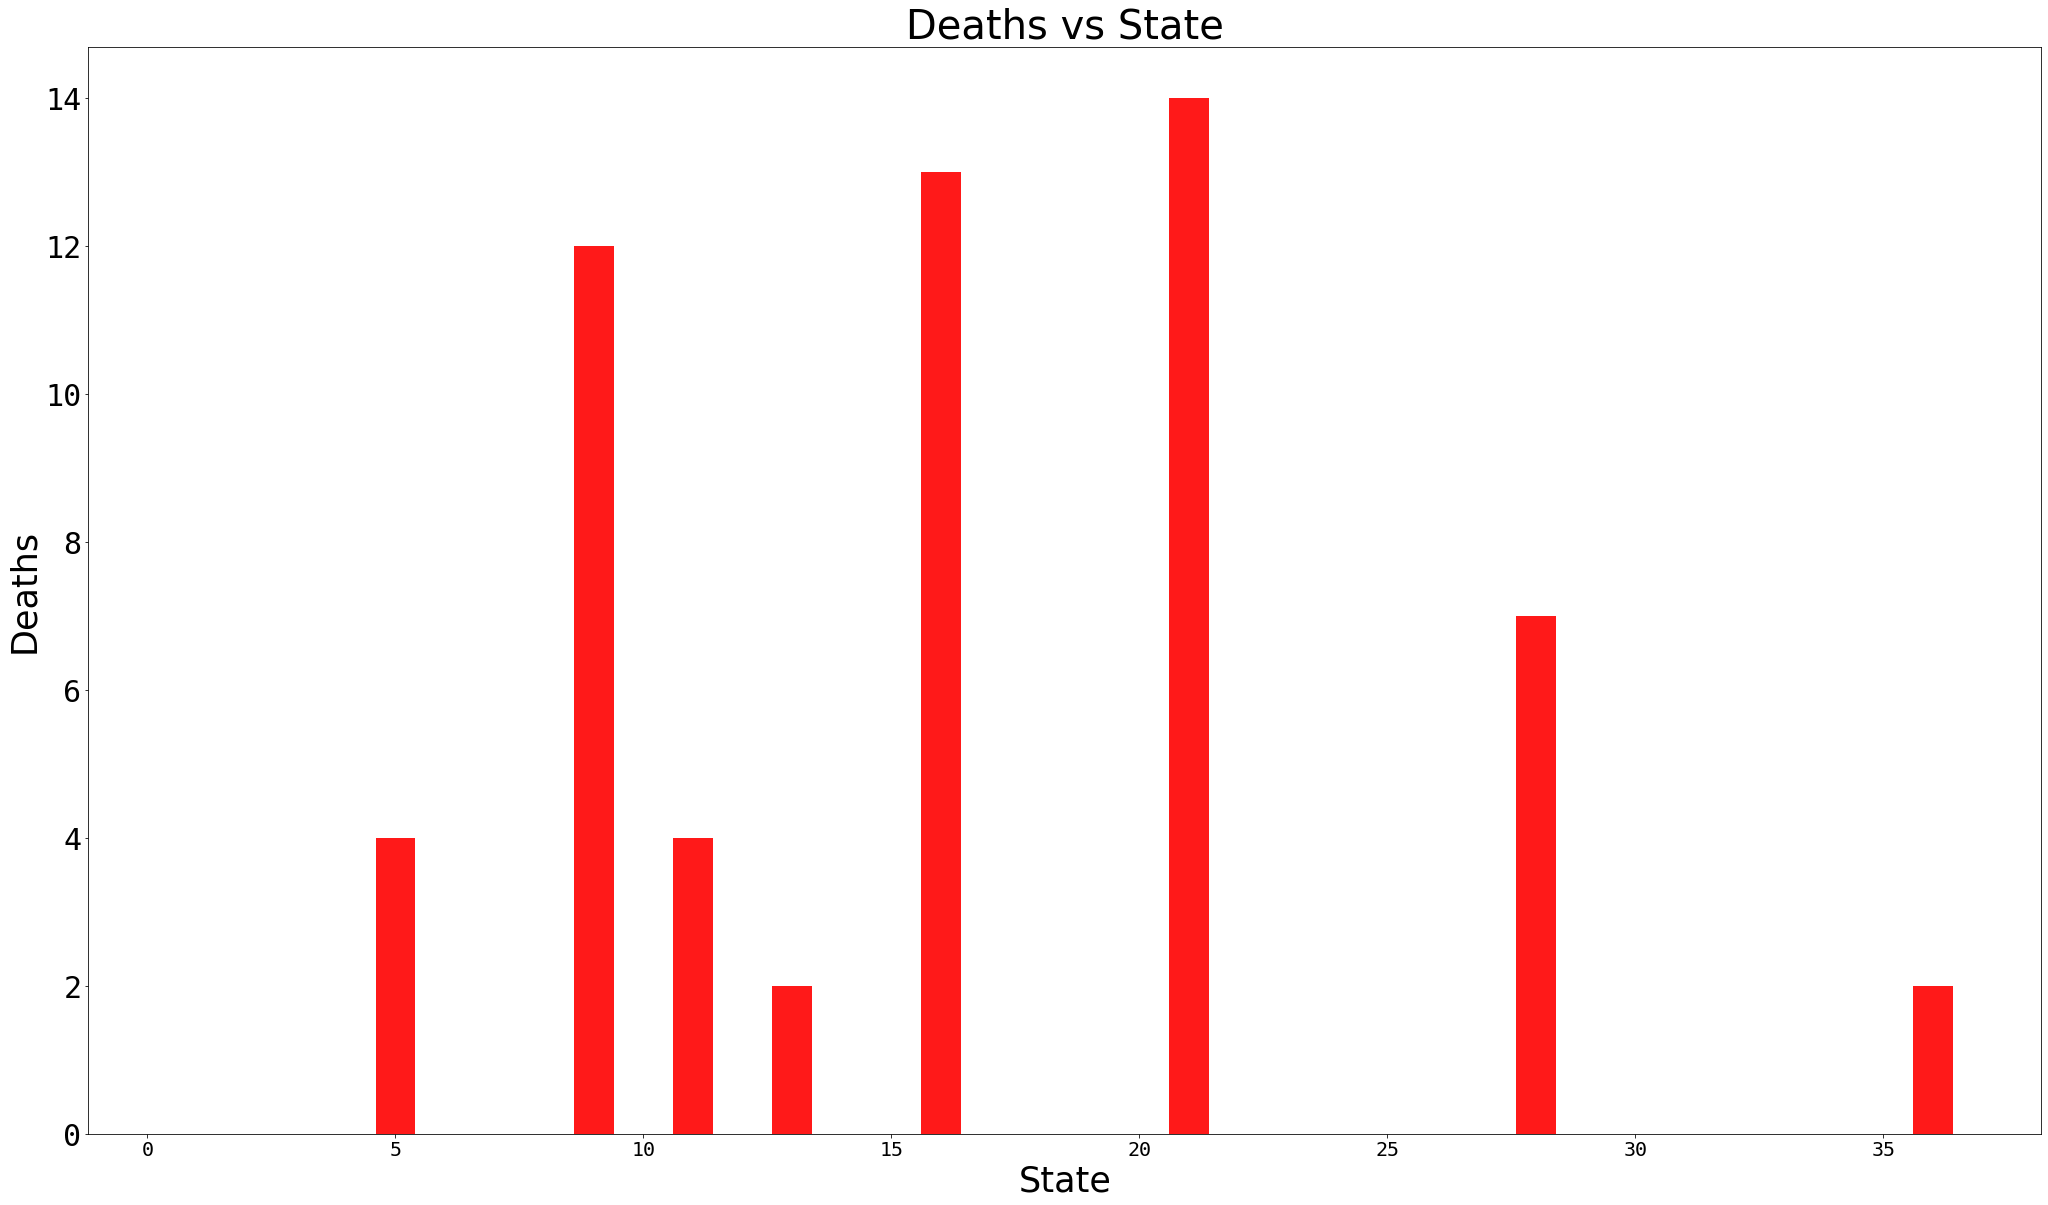

Top 5 states with most deaths:



,State_ID,Deaths
20,21,14
15,16,13
8,9,12
27,28,7
4,5,4


In [441]:
d7=df3
plt.figure(figsize=(35,20))
plt.bar(df3['State_ID'],df3['Deaths'],align='center',alpha=0.9,color="Red")
plt.title("Deaths vs State",size=40)
plt.xlabel("State",size=35)
plt.xticks(fontsize=20,fontname='monospace')
plt.ylabel("Deaths",size=35)
plt.yticks(fontsize=30,fontname='monospace')
plt.show()
d7.sort_values(["Deaths"],axis=0,ascending=False,inplace=True)
print("Top 5 states with most deaths:\n")
d7[['State_ID','Deaths']].head()

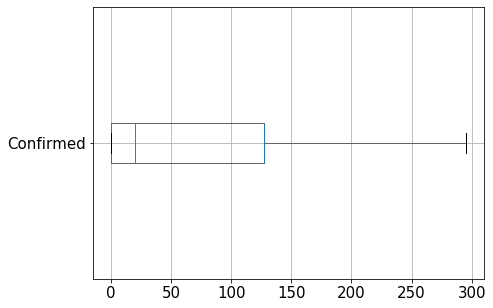

In [446]:
# Boxplot for confirmed cases per state 
plt.figure(figsize=(7,5))
df3.boxplot(['Confirmed'],grid=True,fontsize=15,vert=False,showfliers=False)
plt.show()

In [470]:
Country_geo=r'C:\\Users\\smile\\Desktop\\Prasfur\\Project 2 - COVID19\\states2.json'

In [471]:
dfx=df.groupby("State/UnionTerritory").sum()
dfx=dfx.reset_index()
dfx.head()

,State/UnionTerritory,Cured,Deaths,Confirmed
0,Andaman and Nicobar Islands,181,0,455
1,Andhra Pradesh,1724,365,15541
2,Arunachal Pradesh,8,0,26
3,Assam,216,18,821
4,Bihar,667,49,2824


In [ ]:
indiax= folium.Map(location=[0, 0], tiles='Mapbox Bright',zoom_start=1)
ch=folium.Choropleth(geo_data=Country_geo,data=dfx,columns=['State/UnionTerritory','Confirmed'],key_on='features.coordinates',fill_color='YlGn',fill_opacity=0.7,legend_name='Confirmed').add_to(indiax)

folium.LayerControl().add_to(indiax)
indiax

In [ ]:
https://raw.githubusercontent.com/JohnCoogan/india/master/states2.json